In [2]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(),".."))
sys.path.append(project_root)

# CMIS input voltage offset comparison

We acquired spectra from SIPHRA channel 2 using QC, feeding from SiPM channels 5-8 and compared the output for different values of the `cmis_detector_voffset` parameter (Range: 0 - 255). This parameter controls the voltage accross Vin (see schematic below), which is used to downscalethe input current. The CMIS input offset voltage modifies the SiPM bias voltage, allowing for gain control. The effect of modifying this parameter is clearly seen in the spectra below. Notice that higher values of `cmis_detector_voffset` correspond to higher SiPM gain (i.e. lower Vin voltage), which is clear from the decrease in dynamic range and increase in events triggered from noise (lower energy peak).

**<span style="color:blue">We might want to keep this parameter at 0 to maximize dynamic range.</span>**

<img src="img/etc/SIPHRA_arch.png" width=800> <img src="img/etc/CMIS_internal.png">

In [30]:
import pandas as pd

dfs = []
dfs.append(pd.read_csv('../data/260206/1_SiPM_ChannelsTest_Ch5-8_Ch2_QT_Thr20_cmisvoffset0_Background.csv'))
dfs.append(pd.read_csv('../data/260206/4_SiPM_ChannelsTest_Ch5-8_Ch2_QT_Thr20_cmisvoffset50_Background.csv'))
dfs.append(pd.read_csv('../data/260206/2_SiPM_ChannelsTest_Ch5-8_Ch2_QT_Thr20_cmisvoffset127_Background.csv'))
dfs.append(pd.read_csv('../data/260206/3_SiPM_ChannelsTest_Ch5-8_Ch2_QT_Thr20_cmisvoffset255_Background.csv'))

# dfs[0]

In [31]:
import matplotlib.pyplot as plt

BITS_12 = 2**12
N_BINS = 512

summed_spectra = [df['Ch2'].tolist() for df in dfs]

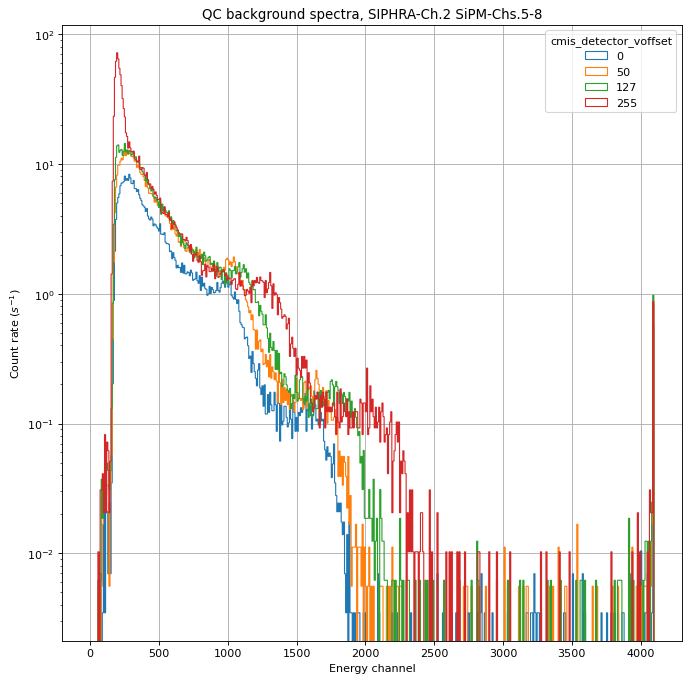

In [32]:
import numpy as np
times = [286.980, 179.172, 161.187, 97.309]
plt.figure(figsize=(10,10), dpi=80)
legend = ['0', '50', '127', '255']
for idx,s in enumerate(summed_spectra):
    plt.hist(s, N_BINS, range=(0,BITS_12), weights=(1/times[idx])*np.ones_like(s), log=True, histtype='step', label=legend[idx])
plt.legend(title="cmis_detector_voffset")
plt.xlabel(r'Energy channel')
plt.ylabel(r'Count rate ($s^{-1}$)')
plt.title('QC background spectra, SIPHRA-Ch.2 SiPM-Chs.5-8')
plt.xticks(np.arange(0,4500,500))
plt.grid()
plt.show()